W 매트릭스를 I로 설정한 거랑 W 매트릭스를 임의로 설정한거랑 2개 비교
W를 I로 두면 trace취한 거랑 같다. (대각선 빼고 다 죽으니까) 44*44 매트릭스에서 대각선만 더하게 되니까

원래 reshape한 loss랑 같은 효과일 것(상수항만 제외)
입력할때도 노드연결 무시하고 돌리니까  거의 순수 LSTM일 것.

# imports 

In [298]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'

In [2]:
import eptstgcn

In [3]:
class Loader(eptstgcn.DatasetLoader):
    def __init__(self,data_dict):
         self._dataset = data_dict 

# data 

In [23]:
# solar dataset
solar = pd.read_csv('./data2/restructuring_data.csv')
solar = solar.drop('date', axis=1)
# solar.head()

In [24]:
solar.shape

(2568, 44)

In [186]:
N = 44 # number of nodes
T = solar.shape[0]
node_ids = solar.columns.tolist()

In [187]:
FX_ = [solar.iloc[i,:] for i in range(T)]
FX = np.stack(FX_).tolist()

In [189]:
np.array(FX).shape

(2568, 44)

In [210]:
# W = np.eye(N)
# W[:(N-2),:(N-2)] = 1 
W = np.array((solar.corr() > 0.93)*1)
W2 = np.eye(N)

In [211]:
data_dict1={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {node_ids[i]: i for i in range(N)}, 
    'weights':W.reshape(-1).tolist(),
    'FX':FX
}
data_dict2={
    'edges':[[i,j] for i in range(N) for j in range(N)], 
    'node_ids': {node_ids[i]: i for i in range(N)}, 
    'weights':W2.reshape(-1).tolist(), 
    'FX':FX
}

# loader -> learn

In [249]:
dataset1 = Loader(data_dict1).get_dataset(lags=1)
dataset2 = Loader(data_dict2).get_dataset(lags=1)
train_dataset1, test_dataset1 = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.9)
train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.9)
lrnr1 = eptstgcn.WeightedLossStgcnLeaner(train_dataset1, dataset_name = 'ver1') # 3
lrnr2 = eptstgcn.WeightedLossStgcnLeaner(train_dataset2, dataset_name = 'ver1')  # 1

In [279]:
def SaveModel(fname, model):
    path = './toy_example2/model/'
    with open(path+fname, 'wb') as fw:
        pickle.dump(model, fw)
        
def LoadModel(fname):
    path = './toy_example2/model/'
    with open(path+fname,'rb') as f:
        model = pickle.load(f)
    return model

- filter개수가 1개일 때는 아예 못맞춤.

# plot

### filter=2 (lag은 1로 동일)

In [328]:
lrnr1.learn(W,filters=2, epoch=30)
lrnr2.learn(W2,filters=2, epoch=30)

In [329]:
import pickle
SaveModel('v1_fil2.pickle',lrnr1)
SaveModel('v2_fil2.pickle',lrnr2)

lrnr1_fil2 = LoadModel('v1_fil2.pickle')
lrnr2_fil2 = LoadModel('v2_fil2.pickle')

In [330]:
evaltor1 = eptstgcn.utils.Evaluator(lrnr1_fil2,train_dataset1,test_dataset1)
evaltor2 = eptstgcn.utils.Evaluator(lrnr2_fil2,train_dataset2,test_dataset2)

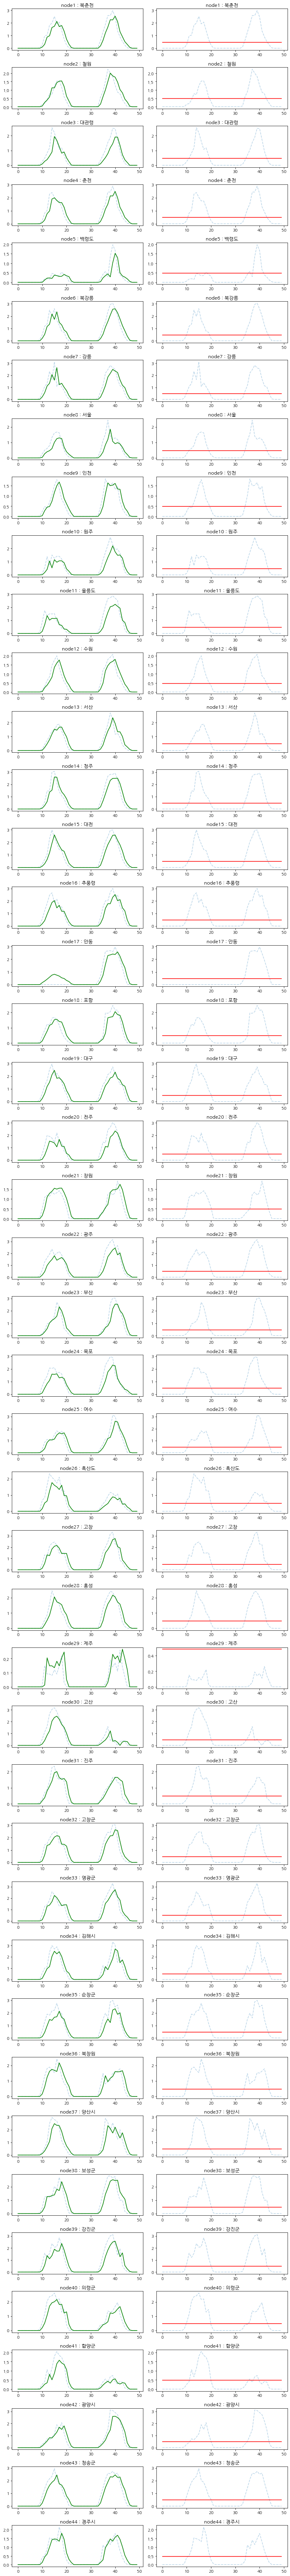

In [331]:
fig,axes = plt.subplots(N,2,figsize=(10,N*2))
n = 50
for i,ax in enumerate(axes): 
    ax[0].plot(evaltor1.f[-n:,i],'--',alpha=0.3)
    ax[1].plot(evaltor2.f[-n:,i],'--',alpha=0.3)
    ax[0].plot(evaltor1.fhat[-n:,i],'-', color='green')
    ax[1].plot(evaltor2.fhat[-n:,i],'-', color='red')
    ax[0].set_title('node{} : {}'.format(i+1,node_ids[i]))
    ax[1].set_title('node{} : {}'.format(i+1,node_ids[i]))
    plt.tight_layout()

### filter=4 

In [ ]:
lrnr1.learn(W,filters=4, epoch=30)
lrnr2.learn(W2,filters=4, epoch=30)

In [284]:
# import pickle
# SaveModel('v1_fil4.pickle',lrnr1)
# SaveModel('v2_fil4.pickle',lrnr2)

lrnr1_fil4 = LoadModel('v1_fil4.pickle')
lrnr2_fil4 = LoadModel('v2_fil4.pickle')

In [285]:
evaltor1 = eptstgcn.utils.Evaluator(lrnr1_fil4,train_dataset1,test_dataset1)
evaltor2 = eptstgcn.utils.Evaluator(lrnr2_fil4,train_dataset2,test_dataset2)

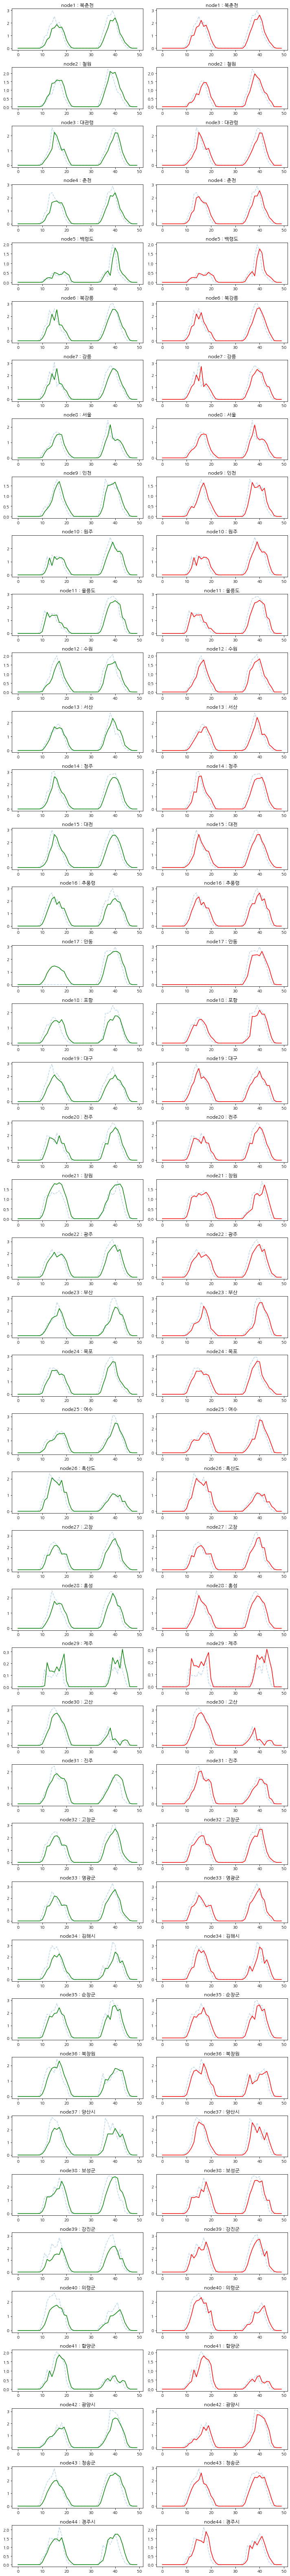

In [319]:
fig,axes = plt.subplots(N,2,figsize=(10,N*2))
n = 50
for i,ax in enumerate(axes): 
    ax[0].plot(evaltor1.f[-n:,i],'--',alpha=0.3)
    ax[1].plot(evaltor2.f[-n:,i],'--',alpha=0.3)
    ax[0].plot(evaltor1.fhat[-n:,i],'-', color='green')
    ax[1].plot(evaltor2.fhat[-n:,i],'-', color='red')
    ax[0].set_title('node{} : {}'.format(i+1,node_ids[i]))
    ax[1].set_title('node{} : {}'.format(i+1,node_ids[i]))
    plt.tight_layout()

- 왼쪽: 임의로 설정
- 오른쪽: Identity matrix

### filter=8

In [320]:
lrnr1.learn(W,filters=8, epoch=30)
lrnr2.learn(W2,filters=8, epoch=30)

In [321]:
import pickle
# SaveModel('v1_fil8.pickle',lrnr1)
# SaveModel('v2_fil8.pickle',lrnr2)

lrnr1_fil8 = LoadModel('v1_fil8.pickle')
lrnr2_fil8 = LoadModel('v2_fil8.pickle')

In [322]:
evaltor1 = eptstgcn.utils.Evaluator(lrnr1_fil8,train_dataset1,test_dataset1)
evaltor2 = eptstgcn.utils.Evaluator(lrnr2_fil8,train_dataset2,test_dataset2)

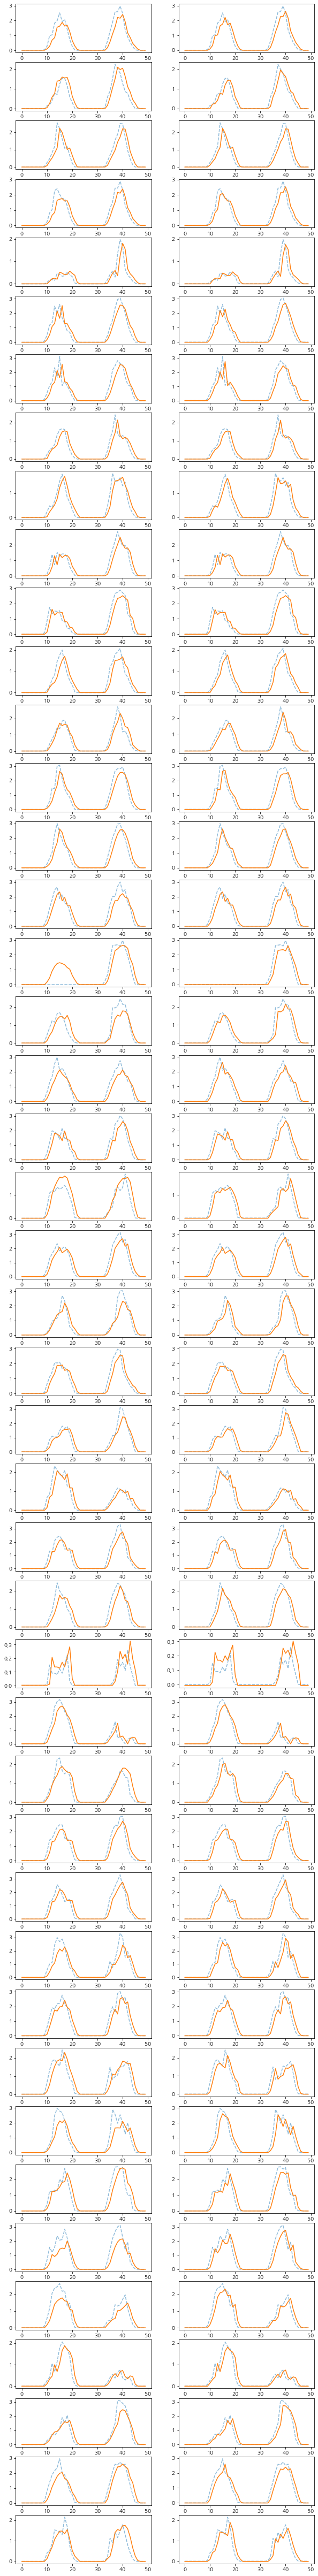

In [323]:
fig,axes = plt.subplots(N,2,figsize=(10,N*2))
n = 50
for i,ax in enumerate(axes): 
    ax[0].plot(evaltor1.f[-n:,i],'--',alpha=0.5)
    ax[1].plot(evaltor2.f[-n:,i],'--',alpha=0.5)
    ax[0].plot(evaltor1.fhat[-n:,i],'-')
    ax[1].plot(evaltor2.fhat[-n:,i],'-')

### filter=16

In [324]:
lrnr1.learn(W,filters=16, epoch=30)
lrnr2.learn(W2,filters=16, epoch=30)

In [325]:
import pickle
SaveModel('v1_fil16.pickle',lrnr1)
SaveModel('v2_fil16.pickle',lrnr2)

lrnr1_fil16 = LoadModel('v1_fil16.pickle')
lrnr2_fil16 = LoadModel('v2_fil16.pickle')

In [326]:
evaltor1 = eptstgcn.utils.Evaluator(lrnr1_fil16,train_dataset1,test_dataset1)
evaltor2 = eptstgcn.utils.Evaluator(lrnr2_fil16,train_dataset2,test_dataset2)

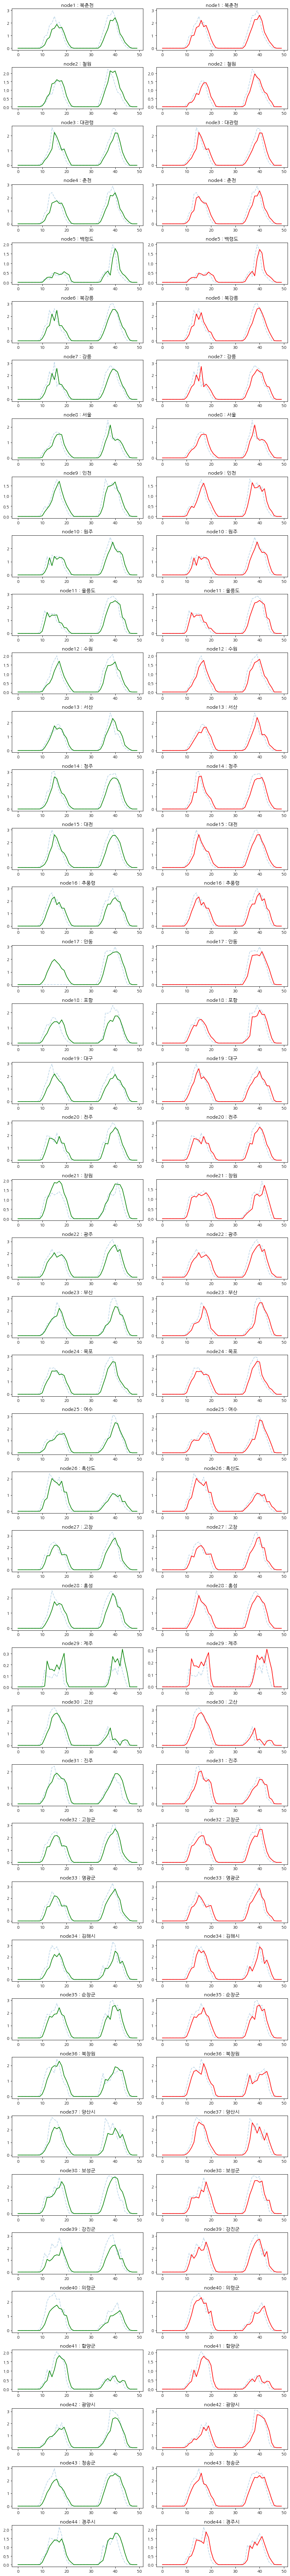

In [327]:
fig,axes = plt.subplots(N,2,figsize=(10,N*2))
n = 50
for i,ax in enumerate(axes): 
    ax[0].plot(evaltor1.f[-n:,i],'--',alpha=0.3)
    ax[1].plot(evaltor2.f[-n:,i],'--',alpha=0.3)
    ax[0].plot(evaltor1.fhat[-n:,i],'-', color='green')
    ax[1].plot(evaltor2.fhat[-n:,i],'-', color='red')
    ax[0].set_title('node{} : {}'.format(i+1,node_ids[i]))
    ax[1].set_title('node{} : {}'.format(i+1,node_ids[i]))
    plt.tight_layout()